In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle

df = pd.read_csv("water_dataset.csv")

X = df[['temperature_C', 'weight_kg', 'height_cm', 'activity_label', 'gender']]
y = df['water_glasses']

cat_cols = ['activity_label', 'gender']

preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
    remainder='passthrough'
)
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)

pickle.dump(pipeline, open("water_model.pkl", "wb"))

print("Model trained and saved successfully!")


Model trained and saved successfully!


In [2]:
from sklearn.metrics import r2_score,mean_absolute_error
print(pipeline.score(X_train,y_train))

0.9627495156407702


In [3]:
y_pred=pipeline.predict(X_test)


In [4]:
print("R^2 score:", pipeline.score(X_test, y_test))


R^2 score: 0.9565989960005369


In [5]:
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE on unseen data:", mae)

MAE on unseen data: 0.4059663549714557


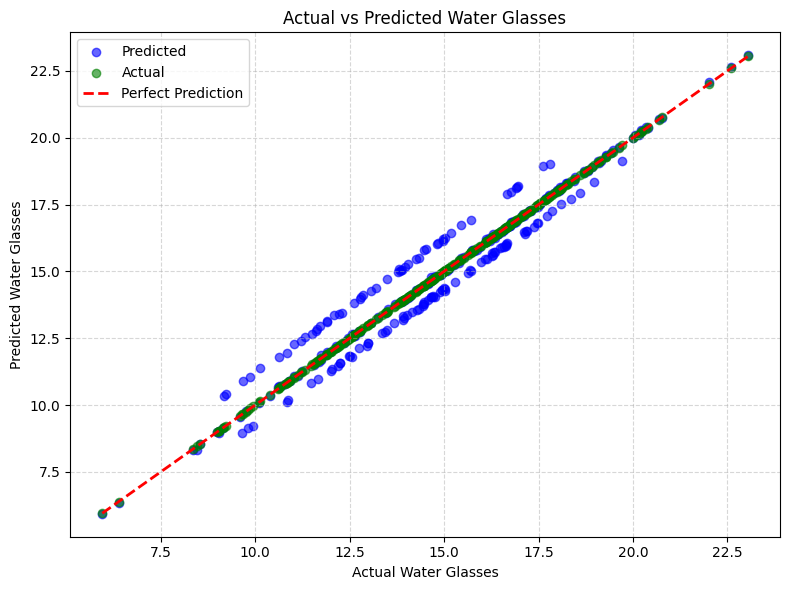

In [6]:
import matplotlib.pyplot as plt

# Predictions
y_pred = pipeline.predict(X_test)

plt.figure(figsize=(8,6))

# Scatter actual vs predicted
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.scatter(y_test, y_test, color='green', alpha=0.6, label='Actual')

# Reference line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Water Glasses')
plt.ylabel('Predicted Water Glasses')
plt.title('Actual vs Predicted Water Glasses')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # subtle grid for better readability
plt.tight_layout()
plt.show()
